# Clusterizaciín / Métricas de Agrupamiento (K-means y DBSCAN) (Core)

Descripción
Métricas de Agrupamiento (K-means y DBSCAN) (Core)

 Descripción:

En esta actividad, se utilizarán los algoritmos K-means y DBSCAN para agrupar datos del dataset «Credit Card Data» disponible en Kaggle. El objetivo es aplicar ambas técnicas de clustering y compararlas utilizando métricas como el «silhouette score» y el «calinski-harabasz index» para evaluar la calidad de los clusters obtenidos.

Enlace al dataset: https://www.kaggle.com/arjunbhasin2013/ccdata



Objetivo:

El objetivo es comparar la efectividad de K-means y DBSCAN en el dataset seleccionado, evaluando la cohesión e intersección de los clusters obtenidos mediante métricas de evaluación. Se espera que los estudiantes comprendan las diferencias entre ambos algoritmos y cómo usar las métricas adecuadas para elegir el mejor modelo de clustering.



Instrucciones:

1. Carga de datos:
- Descarga y carga el dataset «Credit Card Data» de Kaggle. Realiza una exploración inicial de las variables y observa cómo se distribuyen.
- Este dataset incluye información sobre los comportamientos de clientes de tarjetas de crédito. Variables como el monto total de gastos, el número de compras y el saldo de la cuenta son de interés para el agrupamiento.

2. Exploración y preprocesamiento de datos:
- Realiza una limpieza inicial de los datos, eliminando valores atípicos y manejando cualquier valor nulo presente en el dataset.
- Estandariza las variables para asegurar que el rango de las características no afecte el rendimiento de los algoritmos de clustering.
- Selecciona las características más relevantes para el análisis, como los montos de compras y la frecuencia de uso de la tarjeta.

3. Aplicación de K-means y DBSCAN:
- Implementa primero el algoritmo K-means para agrupar los clientes. Determina el número óptimo de clusters utilizando el método del codo y calcula el «silhouette score» para evaluar la cohesión de los clusters formados.
- Luego, aplica DBSCAN al mismo conjunto de datos. Experimenta con diferentes valores de epsilon y min_samples para obtener un clustering que capture tanto los clusters densos como los outliers.
 
4. Comparación mediante métricas:
- Calcula y compara las siguientes métricas de evaluación para ambos algoritmos:
    - Silhouette Score: Esta métrica mide cuán similares son los puntos dentro del mismo cluster en comparación con los puntos de otros clusters.
    - Calinski-Harabasz Index: Esta métrica evalúa la dispersión entre los clusters y dentro de ellos, con mayores valores indicando una mejor definición de clusters.
    - Visualiza ambos agrupamientos utilizando gráficos de dispersión para comparar visualmente cómo K-means y DBSCAN dividen los datos.

5. Interpretación de resultados:
- Discute cuál de los dos algoritmos ofrece un mejor rendimiento en este dataset basado en las métricas calculadas. ¿Los clusters formados por K-means son más cohesivos que los obtenidos con DBSCAN?
- Analiza también los outliers detectados por DBSCAN. ¿Estos puntos tienen comportamientos inusuales en comparación con los clientes agrupados por K-means?



Análisis de Resultados:

- En esta sección, evalúa los resultados de ambos algoritmos y discute cuál de ellos es más adecuado para este tipo de datos. Considera la forma de los clusters, la presencia de outliers y las métricas de evaluación para justificar tu elección.
- Genera un reporte que incluya gráficas comparativas y explique por qué se prefirió un algoritmo sobre el otro. Discute también las limitaciones de cada uno en este caso.



Conclusión:

- Esta actividad busca aplicar y comparar dos técnicas de clustering utilizando métricas estándar de evaluación. A través de esta comparación, se espera que los estudiantes entiendan las fortalezas y debilidades de K-means y DBSCAN, y cómo seleccionar el mejor modelo para diferentes tipos de datos.

In [62]:
import pandas as pd

df = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/CC GENERAL.csv')
print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [63]:
print(df.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [64]:
print(df.dtypes)

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


In [65]:
#Los tipos de datos están correctos
print(df.duplicated().sum())

0


In [66]:
from sklearn.preprocessing import StandardScaler

df_selected = df[['PURCHASES_FREQUENCY','PURCHASES']]

scaler = StandardScaler()

df_scaler = scaler.fit_transform(df_selected)

#Convierto a dataframe de nuevo
df_scaler = pd.DataFrame(df_scaler, columns=df_selected.columns)
print(df_scaler.head())

   PURCHASES_FREQUENCY  PURCHASES
0            -0.806490  -0.424900
1            -1.221758  -0.469552
2             1.269843  -0.107668
3            -1.014125   0.232058
4            -1.014125  -0.462063


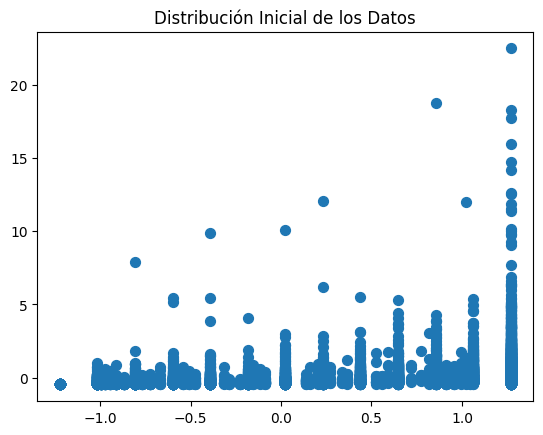

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X = df_scaler.values

# Visualización inicial de los datos
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Distribución Inicial de los Datos")
plt.show()

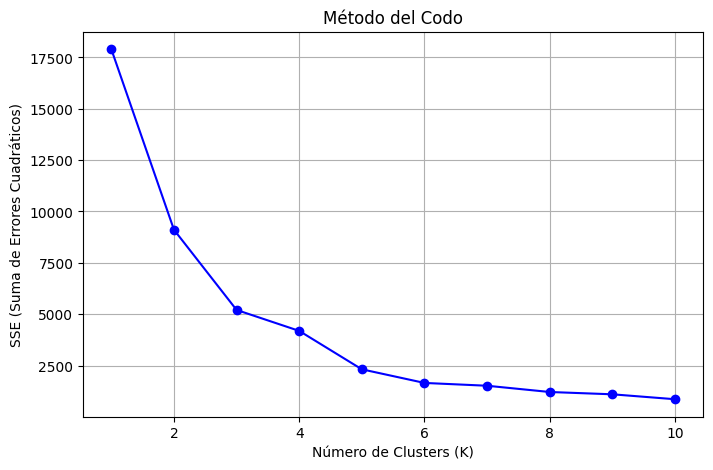

In [68]:
# Veo cual es la mejor K
#Aplico ahora el método del codo
from sklearn.cluster import KMeans
sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_) #Inertia es a suma de los errores cuadráticos

#Grafico del método
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o', linestyle='-', color='blue')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("SSE (Suma de Errores Cuadráticos)")
plt.grid(True)
plt.show()

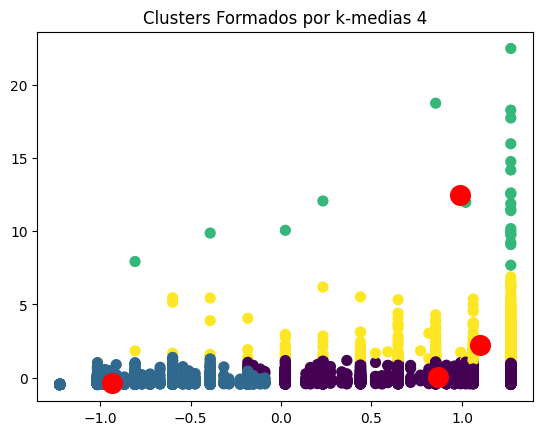

Inercia: 3240.3269008589605
Silhouette Score: 0.6298813292255706
Davies-Bouldin Index: 0.5534958193202166


In [69]:
#Veo que posiblemente es 4 o 5, haré los dos y veré cual es el mejor
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Aplicar k-medias con 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualizar los clusters resultantes
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.title("Clusters Formados por k-medias 4")
plt.show()

#Veo las métricas
# Calcular la Inercia
inertia = kmeans.inertia_
print(f"Inercia: {inertia}")

# Calcular el Silhouette Score
sil_score = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {sil_score}")

# Calcular el Davies-Bouldin Index
db_index = davies_bouldin_score(X, y_kmeans)
print(f"Davies-Bouldin Index: {db_index}")

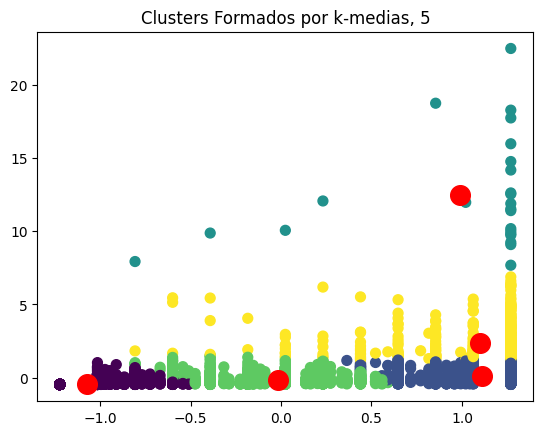

Inercia: 2315.966185282729
Silhouette Score: 0.5835358238147663
Davies-Bouldin Index: 0.5890776386727832


In [70]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Aplicar k-medias con 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualizar los clusters resultantes
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.title("Clusters Formados por k-medias, 5")
plt.show()
# Calcular la Inercia
inertia = kmeans.inertia_
print(f"Inercia: {inertia}")

# Calcular el Silhouette Score
sil_score = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {sil_score}")

# Calcular el Davies-Bouldin Index
db_index = davies_bouldin_score(X, y_kmeans)
print(f"Davies-Bouldin Index: {db_index}")

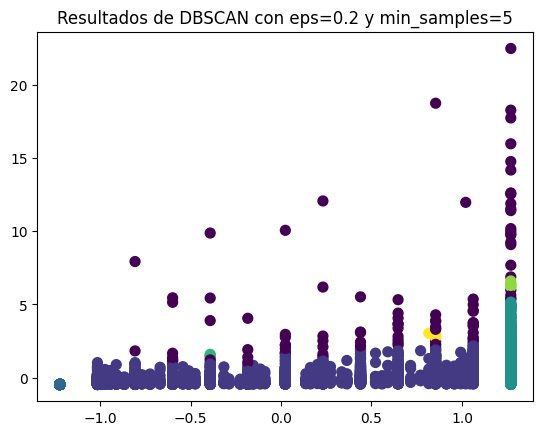

2251.227290791734


In [71]:
#Puedo ver que por más que k=5 tiene menor inercia. k=4 es mehor porque los 
#clusters están mejor definidos y separados.
from sklearn.metrics import calinski_harabasz_score

#Aplicaré DBSCAN ahora
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN con parámetros iniciales
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Resultados de DBSCAN con eps=0.2 y min_samples=5")
plt.show()

calinski_harabasz = calinski_harabasz_score(X, labels)
print(calinski_harabasz)


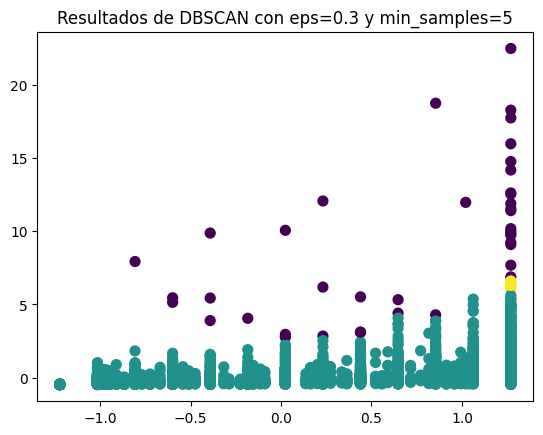

1193.4888022167438


In [72]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Resultados de DBSCAN con eps=0.3 y min_samples=5")
plt.show()
calinski_harabasz = calinski_harabasz_score(X, labels)
print(calinski_harabasz)

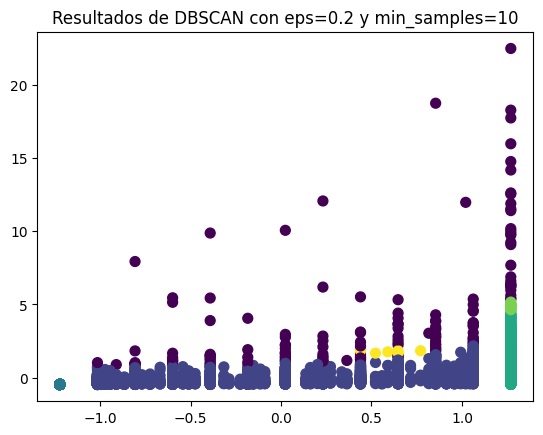

2652.2430145275803


In [73]:
dbscan = DBSCAN(eps=0.2, min_samples=10)
labels = dbscan.fit_predict(X)

# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Resultados de DBSCAN con eps=0.2 y min_samples=10")
plt.show()
calinski_harabasz = calinski_harabasz_score(X, labels)
print(calinski_harabasz)

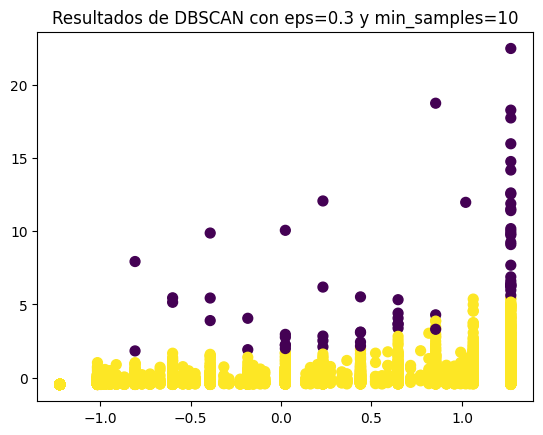

2127.5667773711875


In [74]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
labels = dbscan.fit_predict(X)

# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Resultados de DBSCAN con eps=0.3 y min_samples=10")
plt.show()
calinski_harabasz = calinski_harabasz_score(X, labels)
print(calinski_harabasz)

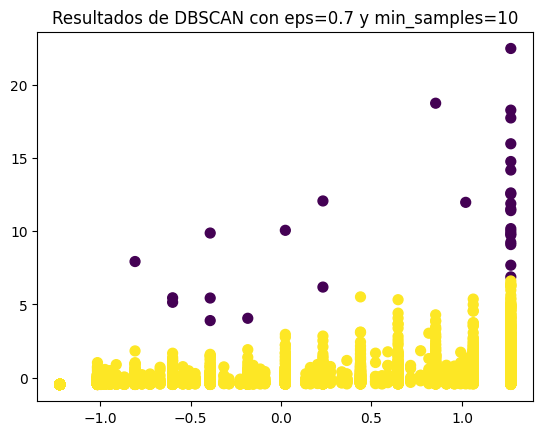

2323.522151906504


In [75]:
dbscan = DBSCAN(eps=0.7, min_samples=10)
labels = dbscan.fit_predict(X)

# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Resultados de DBSCAN con eps=0.7 y min_samples=10")
plt.show()
calinski_harabasz = calinski_harabasz_score(X, labels)
print(calinski_harabasz)

In [76]:
#El mejor es con eps=0.2 y min_samples=10. Tiene clusters bien formados y están
#mejor definidos y separados.


# Conclusión
k-means (k=4) es mejor si lo que se busca es maximizar la separación y la cohesión interna.

DBSCAN (eps=0.2, min_samples=10) es mejor cuando el dataset tiene ruido o outliers significativos.